#### 1.1 Data wrangling

In [1]:
#preliminary code 
#loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.plotly as py
plotly.tools.set_credentials_file(username='haripriya_t_v', api_key='MuMFcUGOV17K4FSCoR1p')
import plotly.graph_objs as go
from sklearn import preprocessing


In [3]:
#reading in the data
data = pd.read_csv("G:\\New Projects\\Asia's Irrigation Potential\\asiaaquastat.csv",  na_values = '.')
data.shape


(576, 48)

In [4]:
data.head()

,Time_period,Country,Region,Total area of the country (1000 ha),% of total country area cultivated (%),Total population (1000 inhab),Rural population (1000 inhab),Urban population (1000 inhab),Population density (inhab/km2),GDP per capita (current US$/inhab),...,% of area equipped for irrigation by groundwater (%),Total harvested irrigated crop area (full control irrigation) (1000 ha),Irrigated cropping intensity (%),% of total grain production irrigated (%),Area salinized by irrigation (1000 ha),Area waterlogged by irrigation (1000 ha),Flood occurrence (WRI) (-),Rural population with access to safe drinking-water (JMP) (%),Urban population with access to safe drinking-water (JMP) (%),Population affected by water related disease (1000 inhab)
0,1958-1962,Bahrain,Asia | Middle East | Arabian Peninsula,69.0,4.3480,173.10,30.5,142.60,250.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1958-1962,Kuwait,Asia | Middle East | Arabian Peninsula,1782.0,0.0561,335.20,78.2,257.00,18.81,5454.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1958-1962,Oman,Asia | Middle East | Arabian Peninsula,30950.0,0.1131,578.80,471.1,107.70,1.87,97.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1958-1962,Qatar,Asia | Middle East | Arabian Peninsula,1161.0,0.0861,56.19,7.8,48.39,4.84,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1958-1962,Saudi Arabia,Asia | Middle East | Arabian Peninsula,214969.0,0.5536,4363.00,2906.0,1457.00,2.03,401.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#wrangling the data
data_wrangled = pd.melt(data, id_vars=['Country', 'Region', 'Time_period'])


In [6]:
#sorting the data by Country
data_wrangled.sort_values(by = 'Country', ascending=True, inplace=True)


In [7]:
#creating new variable names for easy access of variable elements

data_wrangled.loc[(data_wrangled['variable'] == '% of irrigation potential equipped for irrigation (%)'), 'variable_name'] = '%_irr_pot_equipped_for_irr'
data_wrangled.loc[(data_wrangled['variable'] == '% of total country area cultivated (%)'), 'variable_name'] = '%_tot_country_area_cultivated'
data_wrangled.loc[(data_wrangled['variable'] == 'Surface water: leaving the country to other countries (total) (10^9 m3/year)'), 'variable_name'] = 'sur_wat_leaving'
data_wrangled.loc[(data_wrangled['variable'] == 'Area salinized by irrigation (1000 ha)'), 'variable_name'] = 'area_salnzd_irri'
data_wrangled.loc[(data_wrangled['variable'] == 'Surface water: total external renewable (10^9 m3/year)'), 'variable_name'] = 'sur_wat_tot_ext_ren'
data_wrangled.loc[(data_wrangled['variable'] == 'Rural population with access to safe drinking-water (JMP) (%)'), 'variable_name'] = 'ru_pop_acc_drink_wat'
data_wrangled.loc[(data_wrangled['variable'] == 'Urban population (1000 inhab)'), 'variable_name'] = 'ur_pop'
data_wrangled.loc[(data_wrangled['variable'] == 'Flood recession cropping area non-equipped (1000 ha)'), 'variable_name'] = 'flood_recession_area_not_equip'
data_wrangled.loc[(data_wrangled['variable'] == 'Population density (inhab/km2)'), 'variable_name'] = 'pop_density'
data_wrangled.loc[(data_wrangled['variable'] == 'Population affected by water related disease (1000 inhab)'), 'variable_name'] = 'pop_water_rel_disease'
data_wrangled.loc[(data_wrangled['variable'] == 'Groundwater: entering the country (total) (10^9 m3/year)'), 'variable_name'] = 'gr_wat_entering'
data_wrangled.loc[(data_wrangled['variable'] == '% of the cultivated area equipped for irrigation (%)'), 'variable_name'] = '%_cul_area_equipped_for_irr'
data_wrangled.loc[(data_wrangled['variable'] == 'Area equipped for irrigation: actually irrigated (1000 ha)'), 'variable_name'] = 'area_irr_actually_irrigated'
data_wrangled.loc[(data_wrangled['variable'] == 'Area waterlogged by irrigation (1000 ha)'), 'variable_name'] = 'area_waterlogged_by_irr'
data_wrangled.loc[(data_wrangled['variable'] == 'Surface water: entering the country (total) (10^9 m3/year)'), 'variable_name'] = 'sur_wat_entering_tot'
data_wrangled.loc[(data_wrangled['variable'] == 'Overlap between surface water and groundwater (10^9 m3/year)'), 'variable_name'] = 'overlap_bw_sur_gr_wat'
data_wrangled.loc[(data_wrangled['variable'] == 'Urban population with access to safe drinking-water (JMP) (%)'), 'variable_name'] = 'ur_pop_access_drink_wat'
data_wrangled.loc[(data_wrangled['variable'] == '% of area equipped for irrigation by surface water (%)'), 'variable_name'] = '%_area_irr_by_sur_wat'
data_wrangled.loc[(data_wrangled['variable'] == '% of agricultural water managed area equipped for irrigation (%)'), 'variable_name'] = '%_agri_wat_managed_area_for_irrigation'
data_wrangled.loc[(data_wrangled['variable'] == 'Total area of the country (1000 ha)'), 'variable_name'] = 'tot_area_of_country'
data_wrangled.loc[(data_wrangled['variable'] == 'Total internal renewable water resources (IRWR) (10^9 m3/year)'), 'variable_name'] = 'tot_ren_wat_res'
data_wrangled.loc[(data_wrangled['variable'] == 'Groundwater produced internally (10^9 m3/year)'), 'variable_name'] = 'int_gr_wat'
data_wrangled.loc[(data_wrangled['variable'] == 'Cultivated wetlands and inland valley bottoms non-equipped (1000 ha)'), 'variable_name'] = 'wetland_not_equipped'
data_wrangled.loc[(data_wrangled['variable'] == 'Groundwater: leaving the country to other countries (total) (10^9 m3/year)'), 'variable_name'] = 'gr_wat_leaving'
data_wrangled.loc[(data_wrangled['variable'] == 'Total renewable groundwater (10^9 m3/year)'), 'variable_name'] = 'tot_ren_gr_wat'
data_wrangled.loc[(data_wrangled['variable'] == 'Seasonal variability (WRI) (-)'), 'variable_name'] = 'seas_var'
data_wrangled.loc[(data_wrangled['variable'] == 'Rural population (1000 inhab)'), 'variable_name'] = 'ru_pop'
data_wrangled.loc[(data_wrangled['variable'] == 'Total renewable water resources (10^9 m3/year)'), 'variable_name'] = 'tot_ren_wat_res'
data_wrangled.loc[(data_wrangled['variable'] == 'Total population (1000 inhab)'), 'variable_name'] = 'tot_pop'
data_wrangled.loc[(data_wrangled['variable'] == 'Flood occurrence (WRI) (-)'), 'variable_name'] = 'flood_occurance'
data_wrangled.loc[(data_wrangled['variable'] == 'Interannual variability (WRI) (-)'), 'variable_name'] = 'int_var'
data_wrangled.loc[(data_wrangled['variable'] == 'Total dam capacity (km3)'), 'variable_name'] = 'tot_dam_cap'
data_wrangled.loc[(data_wrangled['variable'] == 'Total exploitable water resources (10^9 m3/year)'), 'variable_name'] = 'tot_exploit_wat_res'
data_wrangled.loc[(data_wrangled['variable'] == 'Dependency ratio (%)'), 'variable_name'] = 'dependency_ratio'
data_wrangled.loc[(data_wrangled['variable'] == 'Area equipped for irrigation: total (1000 ha)'), 'variable_name'] = 'area_eqip_for_irr'
data_wrangled.loc[(data_wrangled['variable'] == 'Water resources: total external renewable (10^9 m3/year)'), 'variable_name'] = 'wat_res_tot_ext_ren'
data_wrangled.loc[(data_wrangled['variable'] == 'Irrigation potential (1000 ha)'), 'variable_name'] = 'irr_pot'
data_wrangled.loc[(data_wrangled['variable'] == 'Total renewable surface water (10^9 m3/year)'), 'variable_name'] = '%_tot_ren_sur_wat'
data_wrangled.loc[(data_wrangled['variable'] == '% of total grain production irrigated (%)'), 'variable_name'] = '%_tot_grain_prod'
data_wrangled.loc[(data_wrangled['variable'] == '% of area equipped for irrigation by groundwater  (%)'), 'variable_name'] = '%_area_equi_for_gr_wat'
data_wrangled.loc[(data_wrangled['variable'] == 'Long-term average annual precipitation in volume (10^9 m3/year)'), 'variable_name'] = 'avg_ann_ppt_in_vol'
data_wrangled.loc[(data_wrangled['variable'] == 'Total harvested irrigated crop area (full control irrigation) (1000 ha)'), 'variable_name'] = 'tot_harvested_irr_crop_area'
data_wrangled.loc[(data_wrangled['variable'] == 'GDP per capita (current US$/inhab)'), 'variable_name'] = 'gdp_per_capita'
data_wrangled.loc[(data_wrangled['variable'] == 'Surface water produced internally (10^9 m3/year)'), 'variable_name'] = 'sur_wat_int'
data_wrangled.loc[(data_wrangled['variable'] == 'Irrigated cropping intensity (%)'), 'variable_name'] = 'irr_cropping_intensity'


In [9]:
#viewing the variables
variable_names = data_wrangled[['variable_name', 'variable']].drop_duplicates()
variable_names

,variable_name,variable
17490,%_irr_pot_equipped_for_irr,% of irrigation potential equipped for irrigat...
882,%_tot_country_area_cultivated,% of total country area cultivated (%)
7986,sur_wat_leaving,Surface water: leaving the country to other co...
22962,area_salnzd_irri,Area salinized by irrigation (1000 ha)
8082,sur_wat_tot_ext_ren,Surface water: total external renewable (10^9 ...
24594,ru_pop_acc_drink_wat,Rural population with access to safe drinking-...
2802,ur_pop,Urban population (1000 inhab)
18258,flood_recession_area_not_equip,Flood recession cropping area non-equipped (10...
2898,pop_density,Population density (inhab/km2)
25458,pop_water_rel_disease,Population affected by water related disease (...


In [10]:
#Creating a dictionary to look up for new, more simple regions
region_grouped = {'Asia | Central Asia':'Central Asia',
                  'Asia | Middle East | Caucasus':'Middle East Asia',
                  'Asia | Middle East | Arabian Peninsula':'Middle East Asia',
                  'Asia | Southern and Eastern Asia | South Asia': 'South Asia',
                  'Asia | Southern and Eastern Asia | Maritime Southeast Asia':'South East Asia',
                  'Asia | Southern and Eastern Asia | Mainland Southeast Asia':'South East Asia',
                  'Asia | Southern and Eastern Asia | East Asia':'East Asia',
                  'Asia | Middle East | Iran (Islamic Republic of)':'Middle East Asia',
                  'Asia | Middle East | Near East': 'Middle East Asia'}

In [11]:
#applying renamed region groups to the original Region feature
data_wrangled.Region = data_wrangled.Region.apply(lambda x: region_grouped[x])
print(data_wrangled.Region.unique())

['Central Asia' 'Middle East Asia' 'South Asia' 'South East Asia'
 'East Asia']


In [12]:
#writing up thr data to csv for future use
data_wrangled.to_csv('..\..\data_wrangled.csv')

In [13]:
#looking at data in different ways

#for a time slice
def time_slice(df, Time_period):
    # Only take data for time period of interest
    df = df[df.Time_period == Time_period] 
    # Pivot table 
    df = df.pivot_table(index='Country', columns='variable_name', values='value')    
    df.columns.name = Time_period    
    return df

#for a country
def country_slice(df, Country):    
    # Only take data for country of interest
    df = df[df.Country == Country] 
    # Pivot table 
    df = df.pivot_table(index='variable_name', columns='Time_period', values='value')    
    df.index.name = Country
    return df

#by variable
def variable_slice(df, variable_name):    
    # Only data for that variable
    df = df[df.variable_name == variable_name]    
    # Get variable for each country over the time periods 
    df = df.pivot(index='Country', columns='Time_period', values='value')
    return df
variable_slice(data_wrangled, 'tot_pop').head()

#by region
def subregion(df, Region):
    return df[df.Region==Region]


In [14]:
#describing the panel
countries = data_wrangled.Country.unique()
time_periods = data_wrangled.Time_period.unique()
mid_points = range(1960,2017,5)
regions = data_wrangled.Region.unique()

#### 1.2 Regions equipped for irrigation and are actually irrigated

In [15]:
#area equipped for irrigation and are actually irrigated per variable

#preparing data to plot

central_asia = subregion(data_wrangled, regions[0])
mean_ca_0 = central_asia[central_asia['variable_name'] == 'area_eqip_for_irr']['value'].mean()
mean_ca_0
mean_ca_1 = central_asia[central_asia['variable_name'] == 'area_irr_actually_irrigated']['value'].mean()

middle_east_asia = subregion(data_wrangled, regions[1])
mean_mea_0 = middle_east_asia[middle_east_asia['variable_name'] == 'area_eqip_for_irr']['value'].mean()
mean_mea_1 = middle_east_asia[middle_east_asia['variable_name'] == 'area_irr_actually_irrigated']['value'].mean()

south_asia = subregion(data_wrangled, regions[2])
mean_sa_0 = south_asia[south_asia['variable_name'] == 'area_eqip_for_irr']['value'].mean()
mean_sa_1 = south_asia[south_asia['variable_name'] == 'area_irr_actually_irrigated']['value'].mean()

south_east_asia = subregion(data_wrangled, regions[3])
mean_sea_0 = south_east_asia[south_east_asia['variable_name'] == 'area_eqip_for_irr']['value'].mean()
mean_sea_1 = south_east_asia[south_east_asia['variable_name'] == 'area_irr_actually_irrigated']['value'].mean()

east_asia = subregion(data_wrangled, regions[4])
mean_ea_0 = east_asia[east_asia['variable_name'] == 'area_eqip_for_irr']['value'].mean()
mean_ea_1 = east_asia[east_asia['variable_name'] == 'area_irr_actually_irrigated']['value'].mean()


In [16]:
#data to plot 
n_groups = 5
mean_area_equipped_for_irrigation = (mean_ca_0, mean_mea_0, mean_sa_0, mean_sea_0, mean_ea_0 )
mean_area_actually_irrigated = (mean_ca_1, mean_mea_1, mean_sa_1, mean_sea_1, mean_ea_1 )


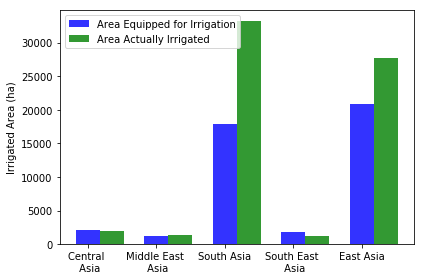

In [20]:
#creating plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, mean_area_equipped_for_irrigation, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Area Equipped for Irrigation') 

bar2 = plt.bar(index + bar_width, mean_area_actually_irrigated, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Area Actually Irrigated')


plt.ylabel('Irrigated Area (ha)')
plt.xticks(index, ('Central \n Asia', 'Middle East \n Asia', 'South Asia',
                               'South East \n Asia', 'East Asia'))


plt.legend(loc = 2)
plt.tight_layout() 

plt.show()

#### 1.3 Irrigation potential across countries in Asia in 2013 - 2017

In [22]:
#extracting irrigation potential for each country for time period of 2013-2017
df_13_17 = time_slice(data_wrangled, time_periods[5])

df_country_ip = df_13_17.sort_values('irr_pot', ascending = False)
df_country_ip['Country'] = df_country_ip.index

In [32]:
#data to plot
data_to_plot = dict(type='choropleth',
            locations = df_country_ip['Country'],
            locationmode = 'country names', z = df_country_ip['irr_pot'],
            text = df_country_ip['Country'], colorbar = {'title':'Irrigation Potential (1000ha):'},
            colorscale=[[0, 'rgb(224,255,255)'],[0.01, 'rgb(166,206,227)'],
                        [0.02, 'rgb(31,120,180)'],[0.03, 'rgb(178,223,138)'],
                        [0.05, 'rgb(51,160,44)'],[0.10, 'rgb(251,154,153)'],
                        [0.20, 'rgb(255,255,0)'],[1, 'rgb(227,26,28)']],    
            reversescale = False)


In [35]:
layout = dict(title='Irrigation Potential of Asian Countries',
              geo = dict(showframe = True, projection={'type':'mercator'}))

In [38]:
#plotting
asia_choromap = go.Figure(data = [data_to_plot], layout = layout)
py.iplot(asia_choromap, validate = False)